In [1]:
#Share specific information
risk_free_rate = 0.1
S_0 = 100
sigma = 0.3

#Option specific information
strike_price = 110 
T = 0.5
t = 0

In [5]:
import numpy as np
import random
from scipy.stats import norm
import math

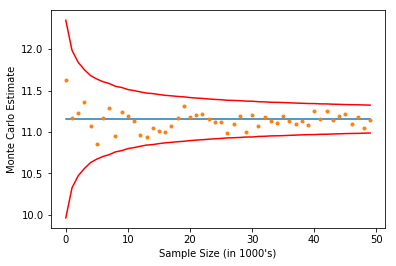

In [10]:
def terminal_shareprice(S_0, risk_free_rate, sigma, Z, T):
    """Generates the terminal share price, given some randon normal values, Z """
    return S_0 * np.exp((risk_free_rate - sigma**2/2) * T + sigma * np.sqrt(T) * Z)

def discounted_call_payoff(S_T, K, risk_free_rate, T):
    """Function to evaluating the discounted payoff of put in Monto Carlo Estimation """
    return np.exp(-risk_free_rate * T) * np.maximum(K - S_T, 0)

#Code for generating Monte Carlo Estimates of vanilla European Put Options
np.random.seed(0)

#Empty arrays which can be used to store estimate vaues of different sample sizes.
mput_estimates = [None]*50
mput_std = [None]*50

#Generating Monte Carlo estimates as a function of sample size.  
for i in range(1, 51):
    norm_array = norm.rvs(size = i * 1000)
    term_val = terminal_shareprice(S_0, risk_free_rate, sigma, norm_array, T)
    mput_val = discounted_call_payoff(term_val, strike_price, risk_free_rate, T)
    mput_estimates[i-1] = np.mean(mput_val)
    mput_std[i-1] = np.std(mput_val)/np.sqrt(i*1000)
    
#Code for analytical solution for vanilla European Put Options
d_1 = (math.log(S_0/strike_price) + (risk_free_rate + sigma**2/2) * (T-t)) / (sigma * math.sqrt(T-t))
d_2 = d_1 - sigma * math.sqrt(T-t)
atl_val = -S_0 * norm.cdf(-d_1) + strike_price * math.exp(-risk_free_rate * (T - t)) * norm.cdf(-d_2)

#Plot the Monte Carlo estimates, the analytical European put option value, and three standard deviation error bounds.
import matplotlib.pyplot as plt

plt.plot([atl_val] * 50)
plt.plot(mput_estimates, '.')
plt.plot(atl_val + np.array(mput_std)*3, 'r')
plt.plot(atl_val - np.array(mput_std)*3, 'r')
plt.xlabel("Sample Size (in 1000's)")
plt.ylabel("Monte Carlo Estimate")
plt.show()